In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, classification_report, plot_roc_curve, f1_score 

pd.set_option('display.max_rows', None)
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
X = df.drop(['target'], axis=1)
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = clf.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Accuracy Score Train:', accuracy_score(y_train, y_train_pred))
print('Accuracy Score:', accuracy_score(y_test, y_test_pred))

Accuracy Score Train: 0.8578199052132701
Accuracy Score: 0.8351648351648352


              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

[[34  8]
 [ 7 42]]


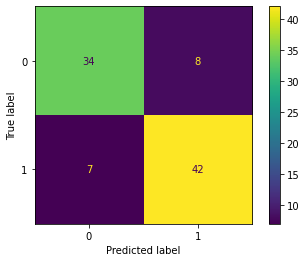

In [8]:
print(classification_report(y_test, y_test_pred,labels=model.classes_))
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

In [9]:
y_pred2 = model.predict_proba(X_test)
#print('ROC AUC: ', roc_auc_score(y_test, y_pred2))

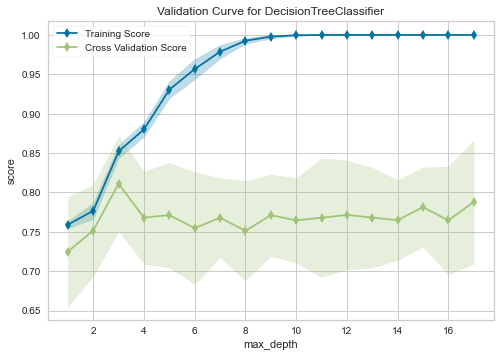

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>

In [10]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth", cv=10, param_range=np.arange(1, 18), scoring='accuracy'
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [12]:
dot_data = export_graphviz(model, filled=True, rounded=True, class_names=list(str(model.classes_)), feature_names=list(model.feature_names_in_), out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')